In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**1. Data Exploration:**
* a. Load the dataset and perform exploratory data analysis (EDA).
* b. Examine the features, their types, and summary statistics.
* c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.





In [6]:
df = pd.read_csv('/content/Titanic_train.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**2. Data Preprocessing:**
* a. Handle missing values (e.g., imputation).
* b. Encode categorical variables.


In [13]:
df.drop(['Cabin','PassengerId','Ticket','Name'], axis = 1, inplace = True)

In [14]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [15]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [17]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
df = pd.get_dummies(df, columns=['Sex','Embarked']).astype(int)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


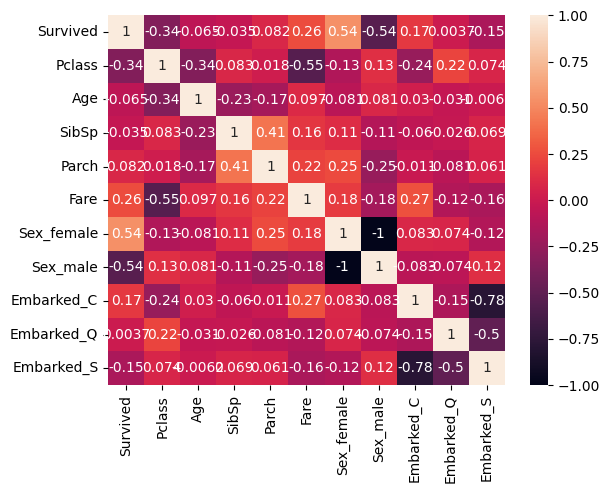

In [22]:
sns.heatmap(df.corr(), annot=True)
plt.show()

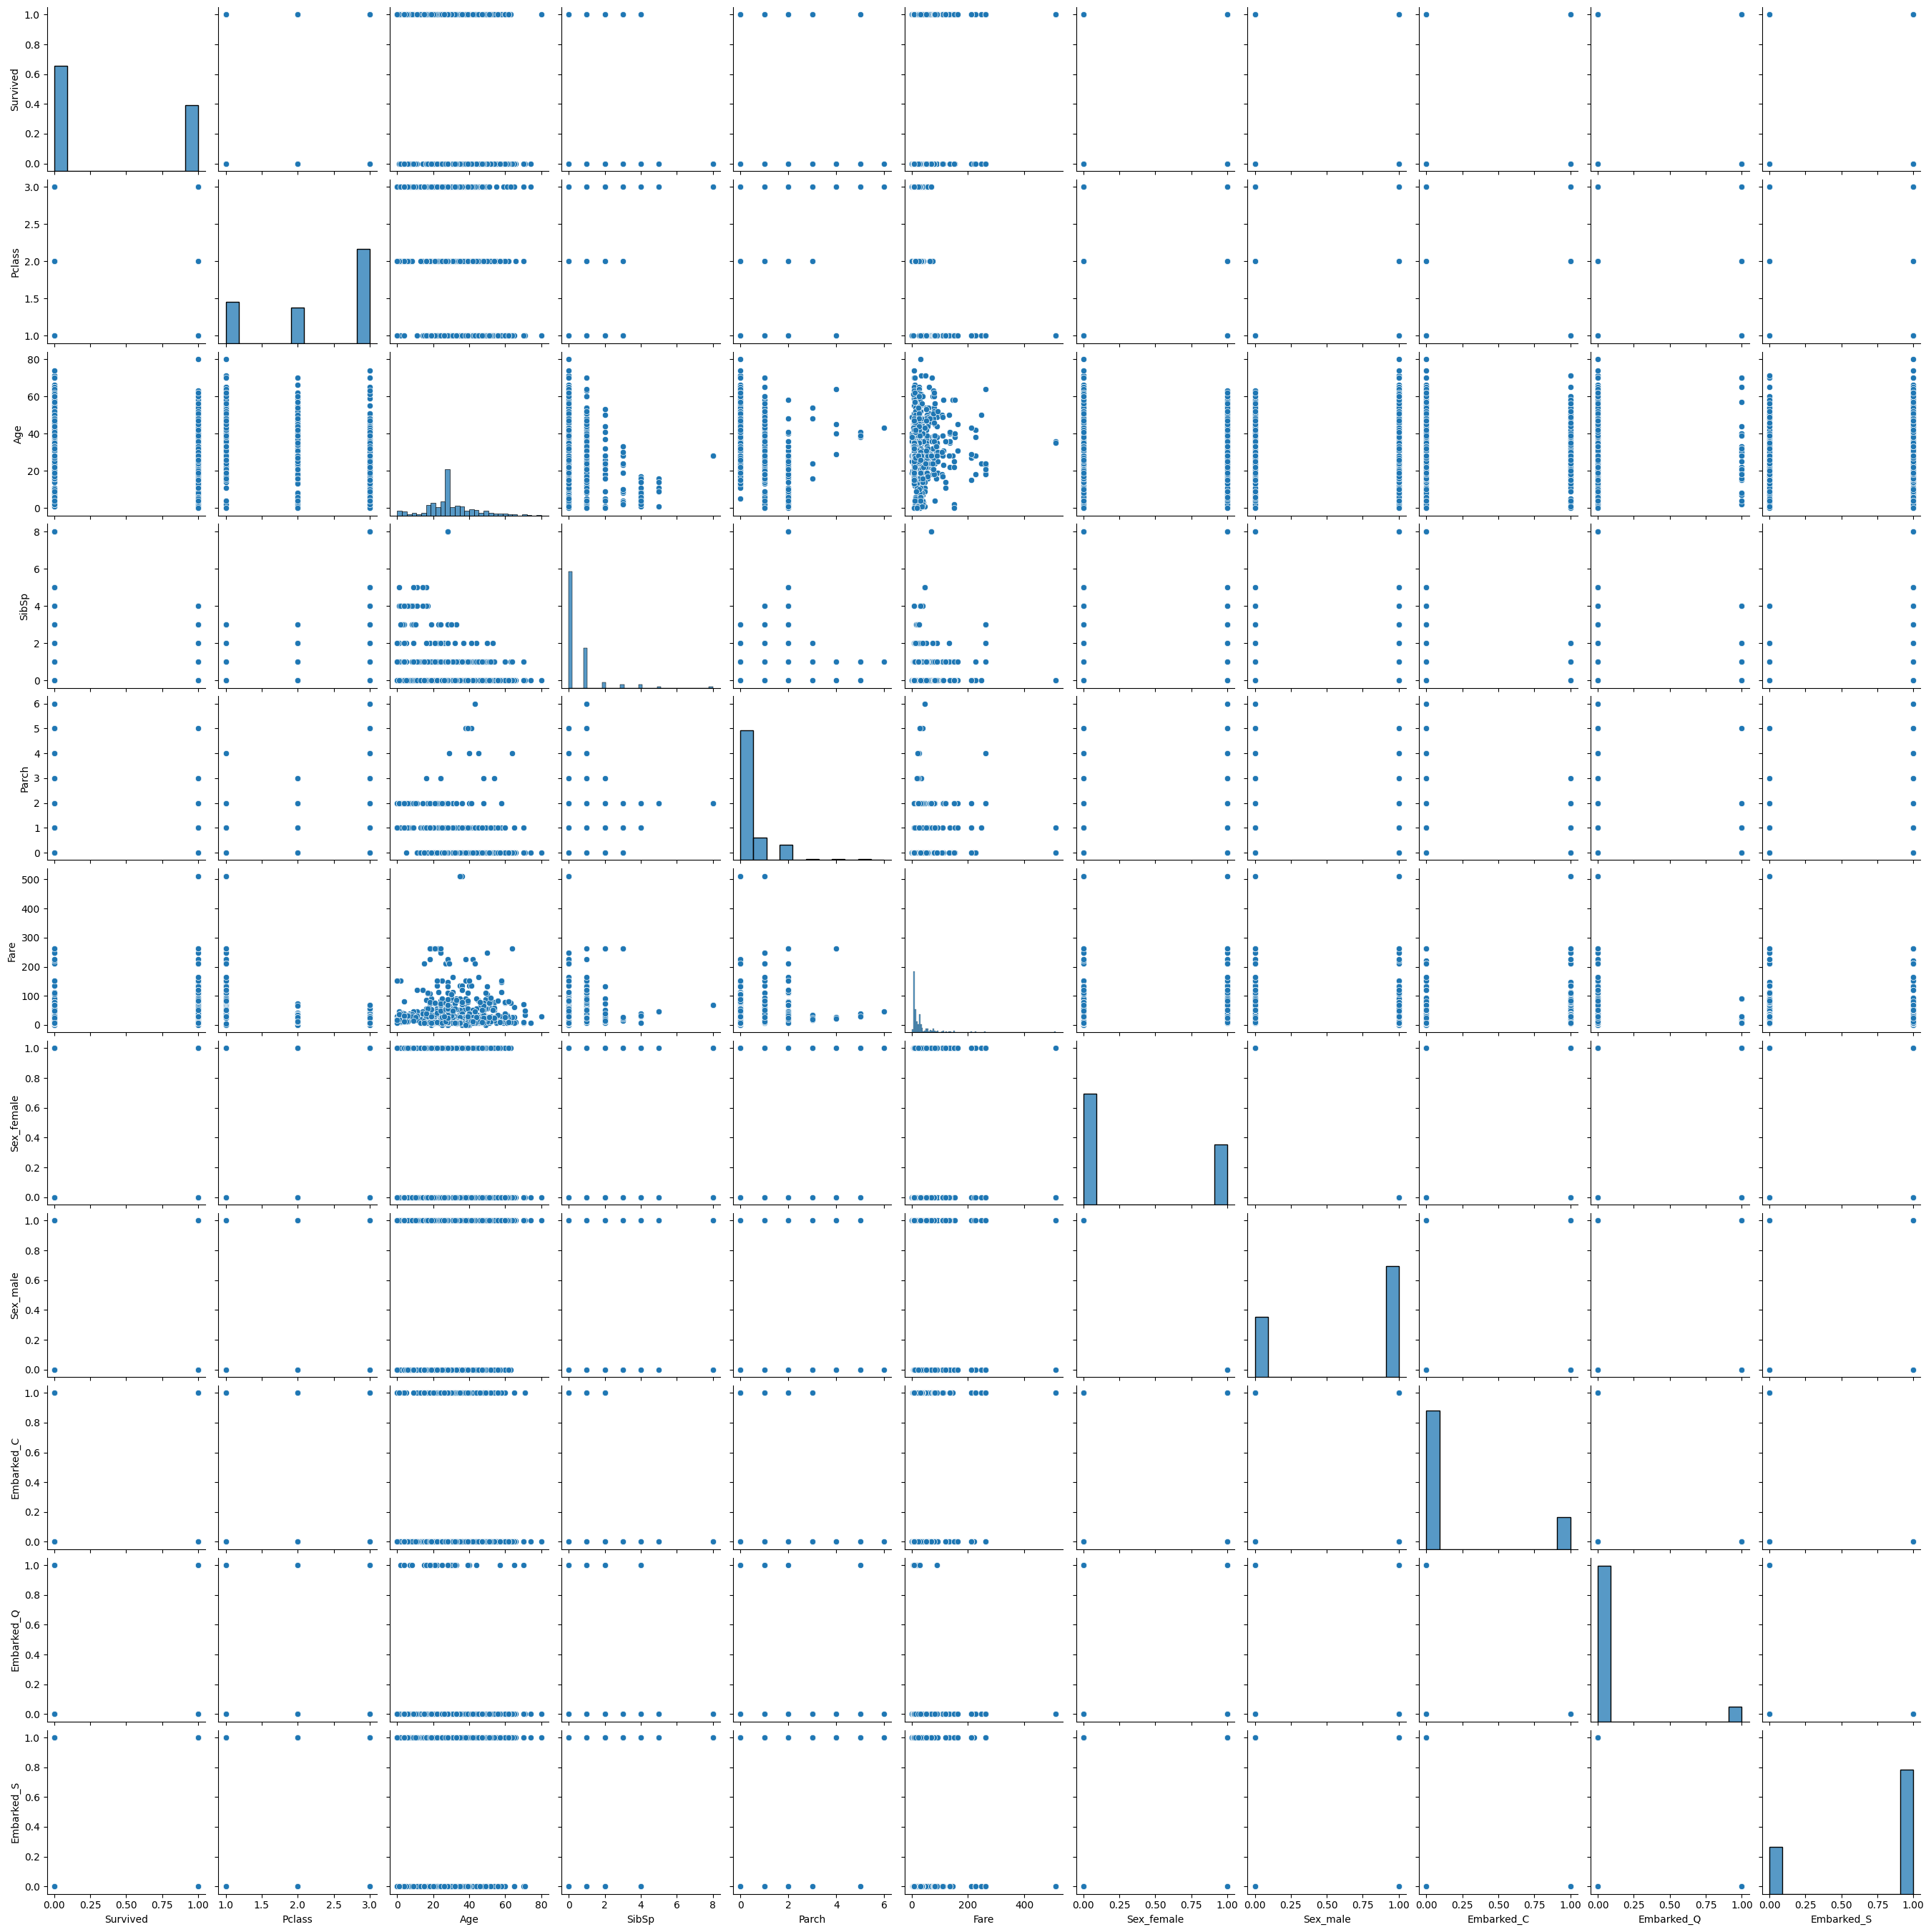

In [21]:
sns.pairplot(df)

In [54]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

**3. Model Building:**
* a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
* b. Train the model using the training data.


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
x = df.iloc[:,1:]

In [25]:
y = df.iloc[:,0]

In [26]:
classifier = LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = classifier.predict(x)

In [28]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [29]:
y_pred_df= pd.DataFrame({'Y': y,'Yhat': classifier.predict(x)})

In [30]:
y_pred_df

,Y,Yhat
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,1


**4. Model Evaluation:**
* a. Evaluate the performance of the model on the testing data using accuracy,  precision, recall, F1-score, and ROC-AUC score.
* Visualize the ROC curve.


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[475  74]
 [103 239]]


In [32]:
((475+239)/(239+103+475+103))*100 # Accuracy

77.6086956521739

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)


In [34]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8013
Precision: 0.7636
Recall: 0.6988
F1 Score: 0.7298


In [35]:
from sklearn.metrics import roc_curve

In [36]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

In [37]:
auc = roc_auc_score(y, y_pred)

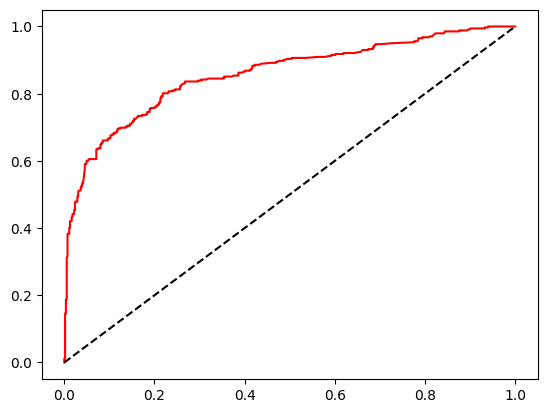

In [38]:
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

In [39]:
auc

np.float64(0.7820199405617869)

**5. Interpretation:**
* a. Interpret the coefficients of the logistic regression model.
* b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [45]:
intercept = classifier.intercept_[0]
coefficients = classifier.coef_[0]

In [48]:
print(f"Intercept: {intercept}")
for feature, coef in zip(x.columns, coefficients):
    print(f"Coefficient for {feature}: {coef}")

Intercept: 1.9872900213232534
Coefficient for Pclass: -1.027804677486036
Coefficient for Age: -0.03634604662097476
Coefficient for SibSp: -0.30462222006508627
Coefficient for Parch: -0.08996131616008812
Coefficient for Fare: 0.002309252390755298
Coefficient for Sex_female: 2.1962609152779127
Coefficient for Sex_male: -0.4525222894017381
Coefficient for Embarked_C: 0.7830857685536219
Coefficient for Embarked_Q: 0.6139493103996564
Coefficient for Embarked_S: 0.3467035469228958


In [79]:
df2 = pd.read_csv('/content/Titanic_test.csv')
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [81]:
df2.drop(['Cabin','PassengerId','Ticket','Name'], axis = 1, inplace = True)

In [82]:
df2['Embarked']=df2['Embarked'].fillna(df2['Embarked'].mode()[0])


In [83]:
df2['Age']=df2['Age'].fillna(df2['Age'].median())

In [84]:
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [87]:
df2 = pd.get_dummies(df2, columns=['Sex','Embarked']).astype(int)

In [88]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34,0,0,7,0,1,0,1,0
1,3,47,1,0,7,1,0,0,0,1
2,2,62,0,0,9,0,1,0,1,0
3,3,27,0,0,8,0,1,0,0,1
4,3,22,1,1,12,1,0,0,0,1


In [89]:
y_pred = classifier.predict(df2)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.2f}")

In [92]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [102]:
y_pred = pd.DataFrame(y_pred)

In [105]:
y_pred.value_counts()

,count
0,
0,262
1,156


In [110]:
df_final =pd.concat([df2, y_pred], axis=1)

In [115]:
df_final = df.rename(columns={'0': 'Survived'})

In [116]:
df_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,0,1,0,0,1
1,1,1,38,1,0,71,1,0,1,0,0
2,1,3,26,0,0,7,1,0,0,0,1
3,1,1,35,1,0,53,1,0,0,0,1
4,0,3,35,0,0,8,0,1,0,0,1


**1. Difference Between Precision and Recall**
* Both precision and recall are evaluation metrics used in classification problems, especially in imbalanced datasets.
  * **Precision (Positive Predictive Value)**
    * Measures how many of the predicted positive instances are actually correct.
    * High precision means fewer false positives.
    * Useful when false positives are costly (e.g., spam email detection, where wrongly marking a legitimate email as spam is bad).
  * **Recall (Sensitivity or True Positive Rate)**
    * Measures how many actual positive instances were correctly predicted.
    * High recall means fewer false negatives.
    * Useful when false negatives are costly (e.g., medical diagnosis, where missing a disease can be dangerous).
  * **Trade-off**: If precision increases, recall may decrease, and vice versa. F1-score is used to balance both.

**2. What is Cross-Validation, and Why is it Important in Binary Classification?**
* **Cross-validation (CV)**
  * A technique to split data into multiple train-test sets to check the model's generalization.
  * Instead of a single train-test split, it repeats the training process multiple times with different splits.
  *K-Fold Cross-Validation is the most common type, where the dataset is divided into K subsets, and the model is trained K times, each time using a different subset as the test set.
* **Why is it important in binary classification?**
  * Reduces overfitting: Ensures the model performs well on unseen data.
  * Provides a more reliable performance estimate: Avoids performance variations due to a single train-test split.
  * Works well with imbalanced data: Helps in evaluating the model across different distributions of positive and negative classes.